kaggle link for downloading the sarcasm data set:

https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection

or use the wget command to copy the file from:

https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json




In [ ]:
# Get the sarcasm data set using wget

!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
      -O /tmp/sarcasm.json


--2020-08-07 06:45:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 172.217.214.128, 172.253.114.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.06s   

2020-08-07 06:45:42 (96.8 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
import json

In [ ]:
# Load the data from json file into python data structures

with open('/tmp/sarcasm.json') as json_file:
  sarcasm_data = json.load(json_file)

In [ ]:
print (sarcasm_data[0])


{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}


sarcasm_data is a list of dictionaries. It is an ideal candate to turn into a pandas dataframe


In [ ]:
import pandas as pd

sarcasm_data_df = pd.DataFrame(data=sarcasm_data)

In [ ]:
sarcasm_data_df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
sarcasm_data_df.shape

(26709, 3)

Lets tokenize headlines, we wont be using article_link

In [ ]:
# Import tensorflow 

import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
vocab_size = 10000
embedding_dim = 32
max_length = 100
trunc_type='post'
padding_type='post'
oov_token = "<NIC>"
training_size = 20000

In [ ]:
# Define the tokenizer object

tokenizer = Tokenizer(num_words=vocab_size, oov_token = oov_token)



In [ ]:
# Build the dictionary

tokenizer.fit_on_texts(sarcasm_data_df['headline'])

In [ ]:
# Print the number of words in the  corpus

print (len(tokenizer.word_index))

29657


In [ ]:
# Turn text into sequences

sequences = tokenizer.texts_to_sequences(sarcasm_data_df['headline'])

In [ ]:
print (sequences[0])

[308, 1, 679, 3337, 2298, 48, 382, 2576, 1, 6, 2577, 8434]


In [ ]:
# Pad the sequences. Padding should happen after the sentence ends

padded_sequences = pad_sequences(sequences,padding=padding_type,truncating=trunc_type,maxlen=max_length)

In [ ]:
print (sequences[0])
print (padded_sequences[0])

[308, 1, 679, 3337, 2298, 48, 382, 2576, 1, 6, 2577, 8434]
[ 308    1  679 3337 2298   48  382 2576    1    6 2577 8434    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [ ]:
# What is the length of the longest headline?

print (len(padded_sequences[0]))

print (padded_sequences.shape)


100
(26709, 100)


In [ ]:
# Lets split the data set into training and testing sets


training_padded = padded_sequences[:training_size]
training_labels = sarcasm_data_df['is_sarcastic'][:training_size]

In [ ]:
print(len(training_padded))
print(len(training_labels))

20000
20000


In [ ]:
# Testing data and lables

testing_padded = padded_sequences[training_size:]
testing_labels = sarcasm_data_df['is_sarcastic'][training_size:]

In [ ]:
print(len(testing_padded))
print(len(testing_labels))

6709
6709


In [ ]:
# Define the architecture of Neural Network

model = tf.keras.Sequential([
                     tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                     tf.keras.layers.Flatten(),
                     tf.keras.layers.Dense(64, activation='relu'),
                     tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
# Compile the model

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                204864    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 524,929
Trainable params: 524,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the data into the model

history = model.fit(training_padded,
          training_labels,
          epochs=30,
          validation_data=(testing_padded,testing_labels))

Epoch 1/30
625/625 [==============================] - 5s 8ms/step - loss: 0.4141 - accuracy: 0.7948 - val_loss: 0.3064 - val_accuracy: 0.8641
Epoch 2/30
625/625 [==============================] - 5s 8ms/step - loss: 0.1723 - accuracy: 0.9352 - val_loss: 0.3438 - val_accuracy: 0.8614
Epoch 3/30
625/625 [==============================] - 5s 7ms/step - loss: 0.0678 - accuracy: 0.9788 - val_loss: 0.4226 - val_accuracy: 0.8580
Epoch 4/30
625/625 [==============================] - 5s 7ms/step - loss: 0.0211 - accuracy: 0.9953 - val_loss: 0.5461 - val_accuracy: 0.8509
Epoch 5/30
625/625 [==============================] - 5s 7ms/step - loss: 0.0066 - accuracy: 0.9991 - val_loss: 0.6165 - val_accuracy: 0.8518
Epoch 6/30
625/625 [==============================] - 5s 7ms/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 0.6620 - val_accuracy: 0.8521
Epoch 7/30
625/625 [==============================] - 5s 7ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.7095 - val_accuracy: 0.8504
Epoch 

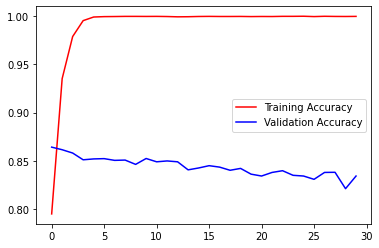

In [ ]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs, val_acc, 'b',label='Validation Accuracy')
plt.legend()
plt.show()

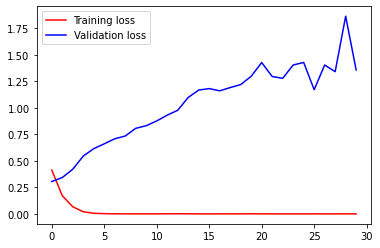

In [ ]:
plt.plot(epochs,loss,'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.legend()
plt.show()

As seen above the loss validation accuracy and validation loss actually deterioate after the first few epochs.

Loss is the amount of confidence you have in your predicition. An increasing loss represents that  decreasing confidence in the acuuracy of your predictions. This is a common problem with NLP applications.

Try to find a set of hyper parameters which gives a training accuracy of 90% or more with a stable loss.
